In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


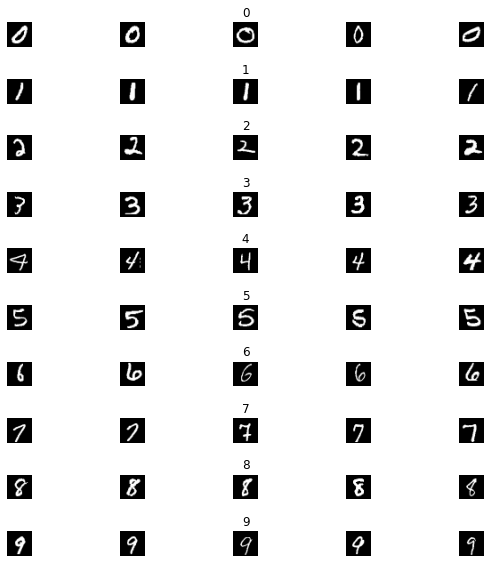

In [5]:
nrows = 10
ncols = 5

fig,axs = plt.subplots(nrows = nrows,ncols = ncols,figsize = (8,8))
fig.tight_layout()

l = []
for i in range(nrows):
  X_selected = X_train[y_train==i]
  l.append(len(X_selected))
  for j in range(ncols):
    axs[i][j].imshow(X_selected[random.randint(0,len(X_selected)-1),:,:],cmap = plt.get_cmap('gray'))
    axs[i][j].axis('off')
    if j == 2:
      axs[i][j].set_title(str(i))

Text(0.5, 1.0, 'Distribution of training set')

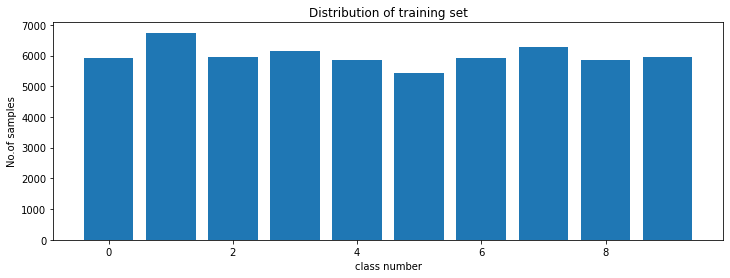

In [6]:
plt.figure(figsize = (12,4))
plt.bar(range(0,len(l)),l)
plt.xlabel('class number')
plt.ylabel('No.of samples')
plt.title('Distribution of training set')

In [0]:
y_train_cat = to_categorical(y_train)

In [0]:
y_test_cat = to_categorical(y_test)

In [0]:
X_train_std = X_train/255.0
X_test_std = X_test/255.0

In [0]:
X_train_flat = X_train_std.reshape(X_train.shape[0],784)
X_test_flat = X_test_std.reshape(X_test.shape[0],784)

In [0]:
model = Sequential()

In [12]:
model.add(Dense(10,input_dim = 784,activation = 'relu'))
model.add(Dense(30,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(Adam(0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In [13]:
h = model.fit(X_train_flat,y_train_cat,validation_split = 0.1,batch_size = 500,epochs =20,shuffle = True,verbose = True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 42us/step - loss: 0.7198 - accuracy: 0.7724 - val_loss: 0.2908 - val_accuracy: 0.9173
Epoch 2/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.3171 - accuracy: 0.9089 - val_loss: 0.2385 - val_accuracy: 0.9327
Epoch 3/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.2602 - accuracy: 0.9248 - val_loss: 0.1959 - val_accuracy: 0.9422
Epoch 4/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.2351 - accuracy: 0.9307 - val_loss: 0.2085 - val_accuracy: 0.9387
Epoch 5/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.2200 - accuracy: 0.9371 - val_loss: 0.1838 - val_accuracy: 0.9488
Epoch 6/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.2043 - accuracy: 0.9412 - val_loss: 0.1871 - val_accuracy: 0.9448
Epoch 7/20
54000/54000 [==============================] - 1s 10us/ste

In [0]:
 accuracy = h.history['accuracy']
 loss = h.history['loss']
 val_loss  = h.history['val_loss']
 val_accuracy = h.history['val_accuracy']

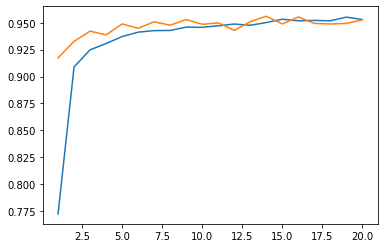

In [15]:
plt.plot(range(1,len(accuracy)+1),accuracy)
plt.plot(range(1,len(accuracy)+1),val_accuracy)

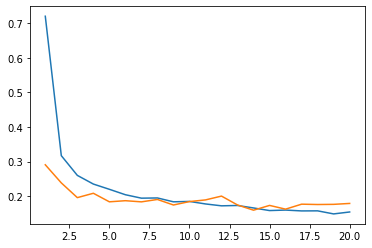

In [16]:
plt.plot(range(1,len(accuracy)+1),loss)
plt.plot(range(1,len(accuracy)+1),val_loss
         )

In [17]:
score = model.evaluate(X_test_flat,y_test_cat)

10000/10000 [==============================] - 1s 58us/step


In [18]:
score

[0.21688934775106608, 0.9416000247001648]

In [0]:
loss = score[0]
acc = score[1] 

In [20]:
loss

0.21688934775106608

In [21]:
acc

0.9416000247001648

In [0]:
import requests
from PIL import Image

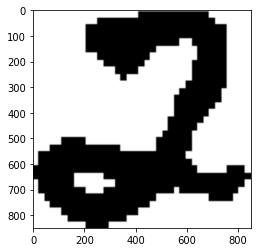

In [23]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
import cv2

In [0]:
np_img = np.asarray(img)

In [26]:
np_img.shape

(850, 850, 4)

In [0]:
np_img = cv2.resize(np_img, (28,28))

In [28]:
np_img.shape

(28, 28, 4)

In [0]:
img = cv2.cvtColor(np_img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

In [0]:
img = img/255.0

In [0]:
img = img.reshape(1,784)

In [0]:
prediction = model.predict_classes(img)

In [33]:
print('Prediction : ',prediction)

Prediction :  [0]
